### Context
(Taken from the dataset provided on Kaggle, [Novel Corona Virus 2019 Dataset])(https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset).<br>
From [World Health Organization](https://www.who.int/emergencies/diseases/novel-coronavirus-2019) - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.

[Johns Hopkins University has made an excellent dashboard](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) using the affected cases data. Data is extracted from the google sheets associated and made available here.

Edited:
Now data is available as csv files in the [Johns Hopkins Github repository](https://github.com/CSSEGISandData/COVID-19). Please refer to the github repository for the [Terms of Use](https://github.com/CSSEGISandData/COVID-19/blob/master/README.md) details. Uploading it here for using it in Kaggle kernels and getting insights from the broader DS community.

Content
2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - [CDC](https://www.cdc.gov/coronavirus/2019-ncov/about/index.html)

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

Column Description
Main file in this dataset is covid_19_data.csv and the detailed descriptions are below.

covid_19_data.csv

Sno - Serial number<br>
ObservationDate - Date of the observation in MM/DD/YYYY<br>
Province/State - Province or state of the observation (Could be empty when missing)<br>
Country/Region - Country of observation<br>
Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)<br>
Confirmed - Cumulative number of confirmed cases till that date<br>
Deaths - Cumulative number of of deaths till that date<br>
Recovered - Cumulative number of recovered cases till that date<br>
2019_ncov_data.csv

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
import pandas as pd
COVID19_line_list_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv")
COVID19_open_line_list = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv")
covid_19_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
time_series_covid_19_confirmed = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
time_series_covid_19_deaths = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
time_series_covid_19_recovered = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")

FileNotFoundError: [Errno 2] File b'../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv' does not exist: b'../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv'

In [3]:
pd.options.display.max_columns=999
import matplotlib.pyplot as plt
%matplotlib inline

The [CIA World Factbook](https://www.cia.gov/library/publications/the-world-factbook/) provides information on the total population of countries.  This data was queried and uploaded for use in this notebook.

In [4]:
pop = pd.read_csv("../input/populationcountries/population.csv")

In [5]:
#list of unique countries/regions
country = covid_19_data['Country/Region'].unique()

In [6]:
covid_19_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
#convert date to datetime format
covid_19_data['ObservationDate'] = pd.to_datetime(covid_19_data['ObservationDate']).dt.date

In [8]:
date = covid_19_data['ObservationDate'].unique()
print('days counted:', len(date),'\n' '1st date:',date.min(),'\n''last date:',date.max())

days counted: 59 
1st date: 2020-01-22 
last date: 2020-03-20


In [9]:
#sum country totals for last date in dataset.
df = pd.DataFrame()
confirmed_sum=[]
country_name=[]
for c in country:
    data=covid_19_data[(covid_19_data['Country/Region']==c) & (covid_19_data['ObservationDate'] == date.max())]
    country_name.append(c)
    confirmed_sum.append(data['Confirmed'].sum())
    
df['country_name']=country_name
df['confirmed_sum']=confirmed_sum   

In [10]:
print('Top 10 countries confirmed cases as of {}'.format(date.max()))
print(df.sort_values(by=['confirmed_sum'], ascending=False).head(10))

Top 10 countries confirmed cases as of 2020-03-20
      country_name  confirmed_sum
0   Mainland China        80977.0
26           Italy        47021.0
30           Spain        20410.0
22         Germany        19848.0
34            Iran        19644.0
4               US        19101.0
16          France        12632.0
7      South Korea         8652.0
45     Switzerland         5294.0
27              UK         4014.0


In [11]:
top_ten=df.sort_values(by=['confirmed_sum'], ascending=False).head(10)
top_ten_countries=list(top_ten.country_name.values)

### Percent increase in confirmed cases by day for top 10 countries

In [12]:
#create a function to dreate df with confirmed sum, % change, and daynum (the number of days recording)
def country_growth(country):
    data = covid_19_data.copy()
    df = pd.DataFrame()
    conf_sum=[]
    date_sum=[]
#    pct_change=[]
    for d in range(0,len(date)):
        date_sum.append(date[d])
        conf_sum.append(data[(data['ObservationDate']==date[d]) &(data['Country/Region']==country)]['Confirmed'].sum())
    df['date']=date_sum
    df['confirmed_sum']=conf_sum
    df['pct_change']=round(df.confirmed_sum.pct_change()*100)
    df['daynum']=range(0,len(date))
    return df

In [1]:
us_growth_rate = country_growth('US')
len(us_growth_rate['date'])
us_growth_rate.head()

NameError: name 'country_growth' is not defined

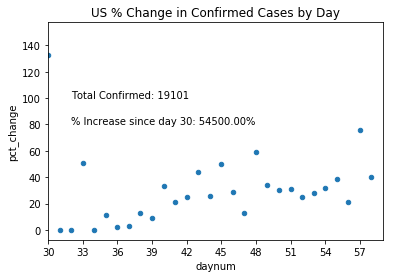

In [14]:
us_growth_rate.plot.scatter(x='daynum',y='pct_change')
plt.xticks(np.arange(0, len(date),step=3))
day_min = 30
day_max = us_growth_rate['daynum'].max()
sum_min = us_growth_rate.loc[us_growth_rate['daynum'] == day_min, 'confirmed_sum'].values[0]
sum_max = us_growth_rate.loc[us_growth_rate['daynum'] == day_max, 'confirmed_sum'].values[0]
pct_tot = round((sum_max/sum_min)-1)*100
plt.xlim(day_min, len(date))
plt.title('US % Change in Confirmed Cases by Day')
x=int(us_growth_rate['confirmed_sum'][len(date)-1])
plt.annotate('Total Confirmed: {}'.format(x),xy=(50,100),xytext=(32,100))
plt.annotate('% Increase since day 30: {0:.2f}%'.format(pct_tot),xy=(50,100),xytext=(32,80))
plt.show()

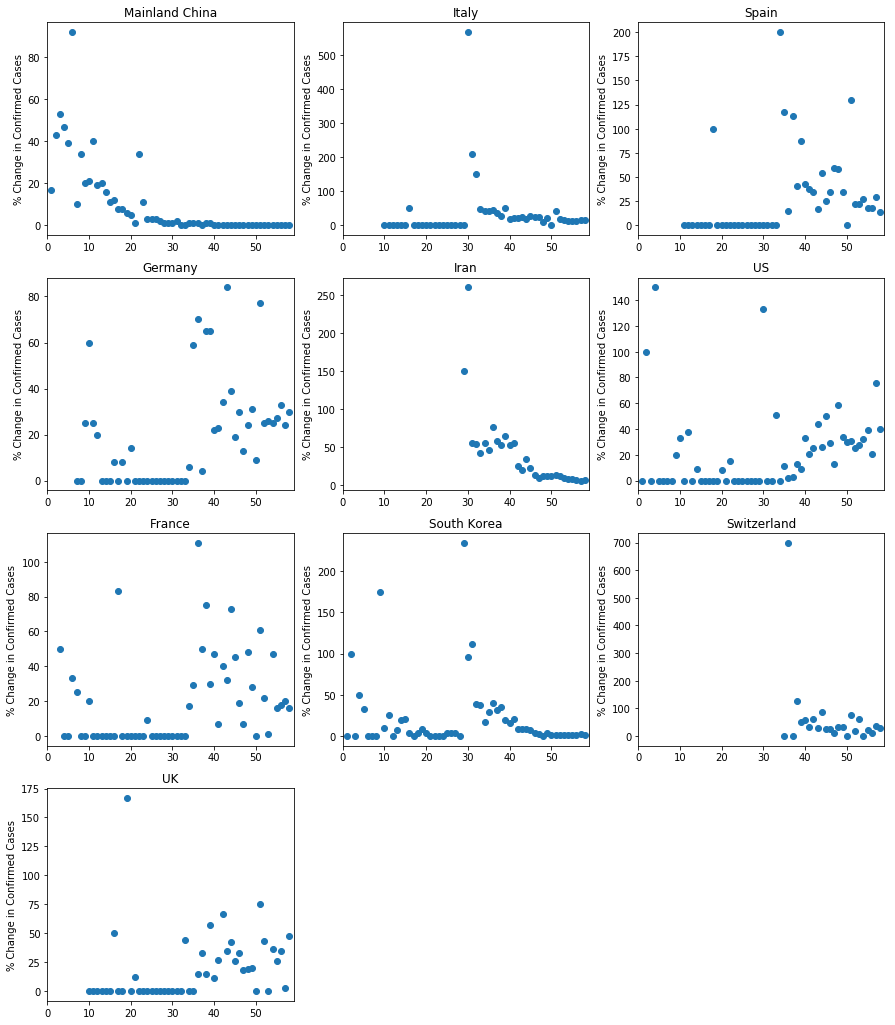

In [15]:
df_label=top_ten_countries

fig = plt.figure(figsize=(15,18))
for l in range(0,len(df_label)):
    df=country_growth(df_label[l])
    ax = fig.add_subplot(4,3,l+1)
    ax.scatter(df['daynum'], df['pct_change'])
    ax.set_title(df_label[l])
    ax.set_ylabel('% Change in Confirmed Cases')
    ax.set_xlim(0, len(date),4)

In [16]:
pop_country=pd.DataFrame(pop)
pop_country=pop_country.drop('Unnamed: 0', axis=1)
pop_country

,name,population,area_land
0,China,1367485388,9326410
1,France,66553766,640427
2,Germany,80854408,348672
3,Iran,81824270,1531595
4,Italy,61855120,294140
5,"Korea, South",49115196,96920
6,Spain,48146134,498980
7,Switzerland,8121830,39997
8,United Kingdom,64088222,241930
9,United States,321368864,9161966


In [17]:
# pop_country.loc[pop_country['name'] == 'France', 'population'].values[0]

In [18]:
#modify country names in the population data set to match names in covid dataset
pop_country=pop_country.replace(['China','United States','Korea, South','United Kingdom'],['Mainland China', 'US','South Korea','UK'])

In [19]:
pop_country

,name,population,area_land
0,Mainland China,1367485388,9326410
1,France,66553766,640427
2,Germany,80854408,348672
3,Iran,81824270,1531595
4,Italy,61855120,294140
5,South Korea,49115196,96920
6,Spain,48146134,498980
7,Switzerland,8121830,39997
8,UK,64088222,241930
9,US,321368864,9161966


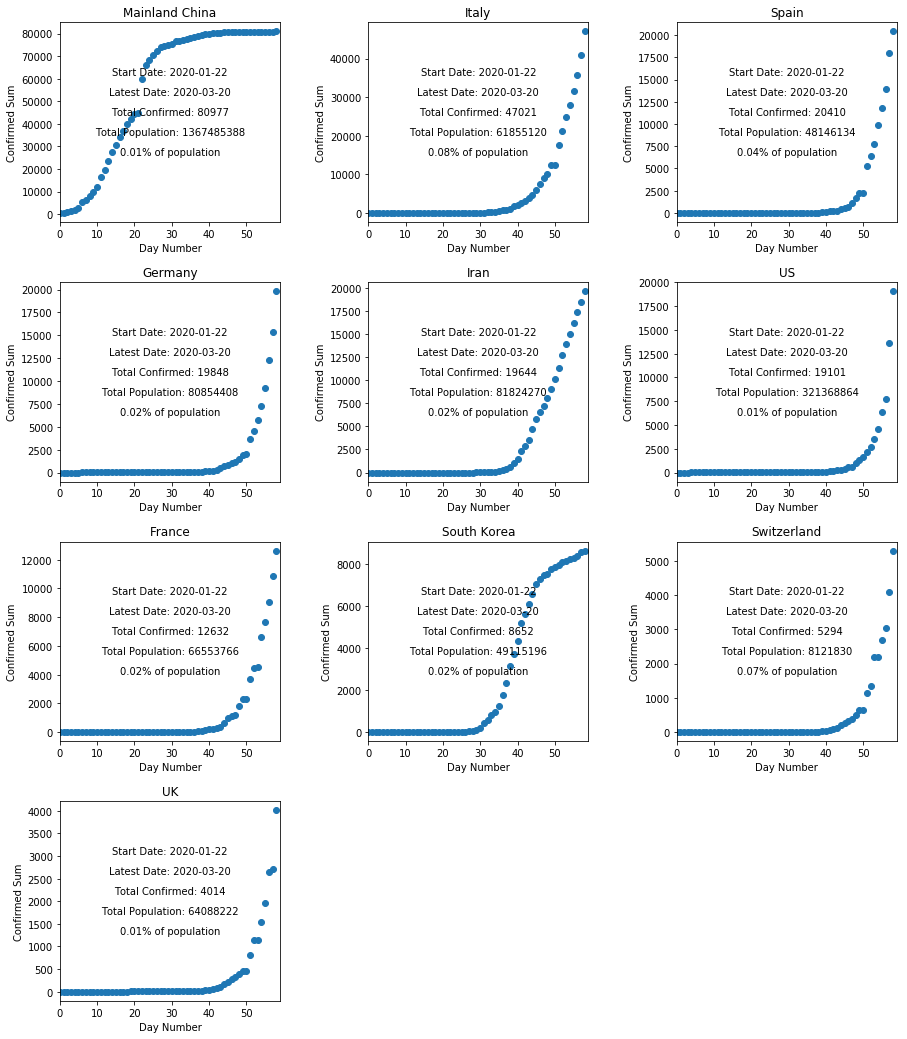

In [20]:
df_label=top_ten_countries

fig = plt.figure(figsize=(15,18))
for l in range(0,len(df_label)):
    df=country_growth(df_label[l])
    ax = fig.add_subplot(4,3,l+1)
    ax.scatter(df['daynum'], df['confirmed_sum'])
    x=int(df['confirmed_sum'][len(date)-1])
    d_max= df['date'].max()
    d_min= df['date'].min()
    pc=pop_country.loc[pop_country['name'] == df_label[l], 'population'].values[0]
    pct=(x/pc)*100
    ax.text(0.5, 0.55, 'Total Confirmed: {}'.format(x), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5, 0.45, 'Total Population: {}'.format(pc), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5, 0.35, '{0:.2f}% of population'.format(pct), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5, 0.65, 'Latest Date: {}'.format(d_max), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5, 0.75, 'Start Date: {}'.format(d_min), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    
    ax.set_title(df_label[l])
    ax.set_ylabel('Confirmed Sum')
    ax.set_xlabel('Day Number')
    ax.set_xlim(0, len(date),4)
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.savefig('top 10.pdf')

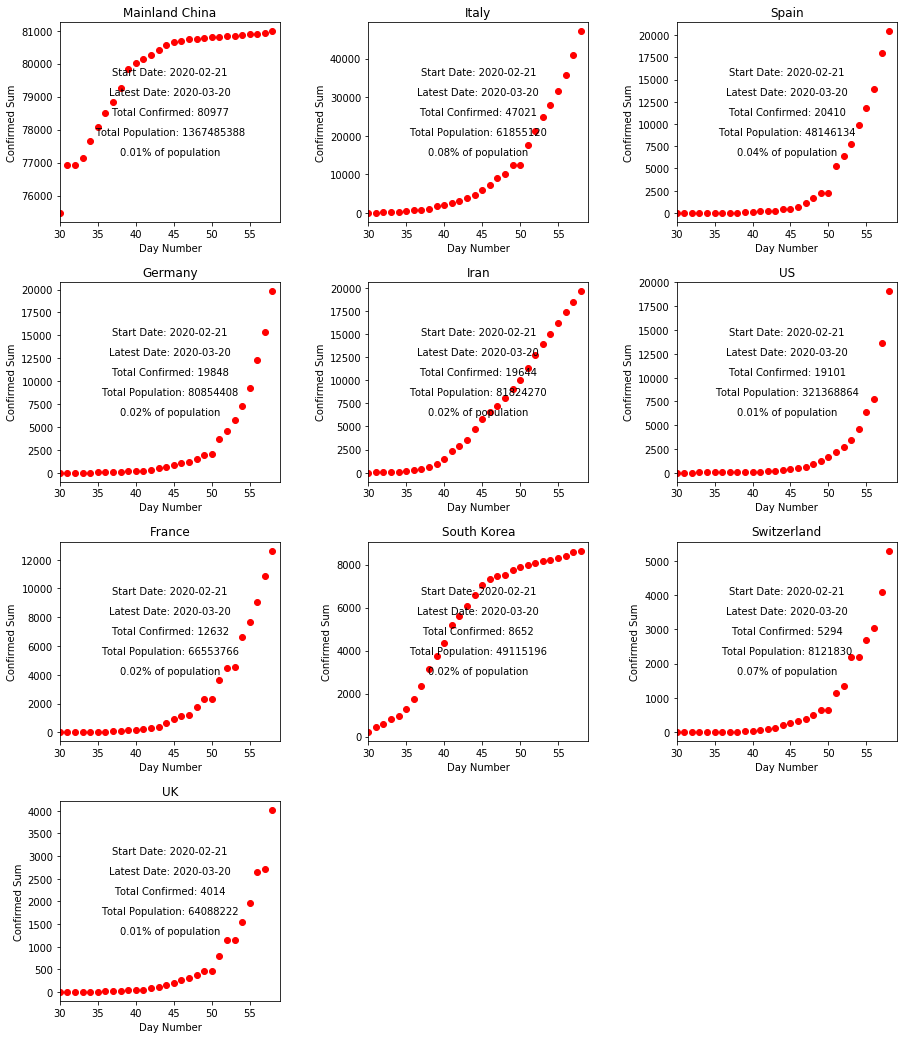

In [21]:
df_label=top_ten_countries

fig = plt.figure(figsize=(15,18))
for l in range(0,len(df_label)):
    df=country_growth(df_label[l])
    df_day30=df[df['daynum']>=30]
    ax = fig.add_subplot(4,3,l+1)
    ax.scatter(df_day30['daynum'], df_day30['confirmed_sum'],color='red')
    x=int(df_day30['confirmed_sum'][len(date)-1])
    d_max = df_day30['date'].max()
    d_min = df_day30['date'].min()
    pc=pop_country.loc[pop_country['name'] == df_label[l], 'population'].values[0]
    pct=(x/pc)*100
    ax.text(0.5, 0.55, 'Total Confirmed: {}'.format(x), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5, 0.45, 'Total Population: {}'.format(pc), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5, 0.35, '{0:.2f}% of population'.format(pct), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5, 0.65, 'Latest Date: {}'.format(d_max), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5, 0.75, 'Start Date: {}'.format(d_min), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    
    ax.set_title(df_label[l])
    ax.set_ylabel('Confirmed Sum')
    ax.set_xlabel('Day Number')
    ax.set_xlim(30, len(date),4)
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.savefig('top 10 last 30.pdf')